### Jakub Ochman    grupa 3.   AiR
#### Zadanie 1

Implementacja DPA:

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def DPA(G, a, s):
    # G - graf w formie listy sąsiedztwa
    # a(u, v) - funkcja określająca wagę krawędzi między dwoma wierzchołkami
    # s - wierzchołek początkowy
    suma = 0 # sumaryczna waga krawędzi
    Q = [] # zbiór wierzchołków nienależących do MST
    A = [] # zbiór krawędzi MST  przechowuje krawedzie jako krotki (wierzchołek, wierzchołek)
    alfa = {} # słownik przechowujący dane   wierzchołek -> jego poprzednik
    beta = {} # słownik przechowujący dane   wierzchołek -> waga krawędzi z MST
    for u, neighbours in G.items():    # dla każdego wierzchołka z grafu
        alfa[u] = 0    # jego poprzedni wierzchołek to 0 (inicjalizacja)
        beta[u] = np.inf # waga krawędzi do MST to nieskończoność (inicjalizacja)
        Q.append(u)  # Dodawanie wierzchołka do zbioru wierzchołków nienależących do MST
    beta[s] = 0    # Odległość początkowego wierzchołka od MST to 0
    Q.remove(s)   # Usuwanie początkowego wierzchołka z Q
    u_last = s    # Ostatnim sprawdzanym wierzchołkiem był początkowy
    while len(Q) != 0:  # Główna pętla dla wszystkich niesprawdzonych
        for u in Q:   # dla każdego wierzchołka w Q
            if u in G[u_last]:  # Jeśli sąsiaduje z ostatnio sprawdzanym wierzchołkiem
                if a(u, u_last) < beta[u]:   # jeśli waga ich krawędzi jest mniejsza niż wierzchołka z MST
                    alfa[u] = u_last  # Poprzednikiem tego wierzchołka był ostatnio sprawdzany
                    beta[u] = a(u, u_last)  # Odległość tego wierzchołka od MST to waga krawędzi aktualnie sprawdzanego z poprzednio
        arg_min = None # deklaracja arg_min potrzebna do wyszukania wierzchołka z najmniejszą betą
        min_beta = np.inf # skoro najmniejsza na początku jest inf to każda != inf będzie mniejsza
        for u in Q:  
            if beta[u] < min_beta: # jeśli beta aktualnego wierzchołka jest mniejsza od ostatnio sprawdzanej
                min_beta = beta[u]   # to aktualny ma mniejszą
                arg_min = u # zostanie wyznaczony jako potencjalny najmniejszy
        if arg_min == None: # Sprawdzenie czy arg_min == None, jeśli tak, to graf niespójny
            break  # przerywa poszukiwania
        u_last = arg_min  # znaleziono wierzchołek o najmniejszym beta
        Q.remove(u_last)  # usuwanie go z Q
        A.append((alfa[u_last], u_last))  # Dodawanie krotki reprezentującej krawędz do MST
        suma = suma + a(alfa[u_last], u_last)  # Dodanie wagi krawędzi do całościowej sumy
    return (A, suma)


Podobnie jak podczas poprzedniego laboratorium wykorzystano biblioteki networkX oraz matplotlib w celu graficznej wizualizacji grafów. Funkcję rysującą graf zmodyfikowano, tak aby przyjmowała dwa parametry, graf jako słownik oraz drugi graf w formie listy krotek. Dzięki temu na jednym wykresie będzie można wyrysować podstawowy graf oraz jego minimalne drzewo rozpinające

In [89]:
def print_graph_mst(graph1, edges2):
    G1 = nx.Graph()
    for node, neighbors in graph1.items():
        for neighbor in neighbors:
            G1.add_edge(node, neighbor)
    
    G2 = nx.Graph()
    G2.add_edges_from(edges2)
    
    pos = nx.spring_layout(G1)
    
    plt.figure(figsize=(6, 6))
    
    nx.draw(G1, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=14, alpha=0.6)
    nx.draw(G2, pos, with_labels=True, node_color='lightblue', edge_color='red', node_size=500, font_size=14, alpha=0.6)
    
    plt.show()

Dla przykładu zdefiniowano przykładowy graf zawierający cykl. 
Poniżej przedstawiono przykładowe wykorzystanie algorytmu, oraz wykreslono graf. Funkcja wag krawędzi zawsze zwraca 1, a więc wszystkie krawędzie mają te same wagi. 

Suma wag krawędzi MST: 9
MST: [(3, 1), (1, 0), (0, 2), (1, 4), (2, 5), (2, 6), (4, 7), (6, 8), (4, 9)]


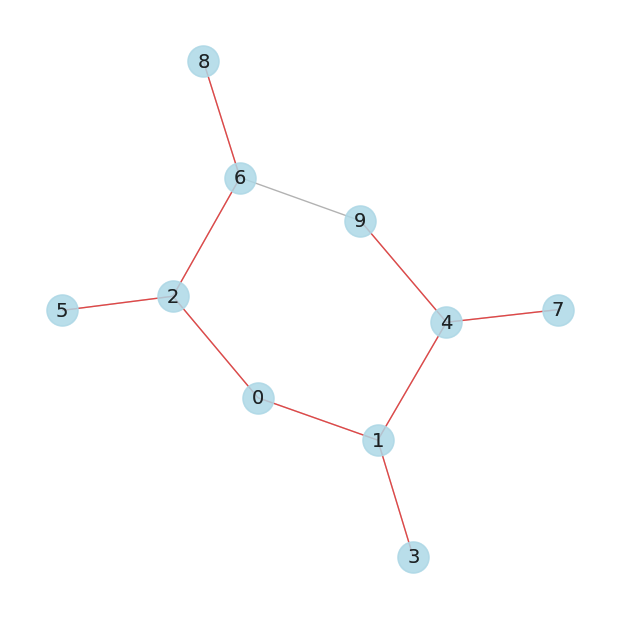

In [103]:
def a(v, u):
    return 1

graph = {    
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1],
    4: [1, 7, 9],
    5: [2],
    6: [2, 8, 9],
    7: [4],
    8: [6],
    9: [6, 4]
    }
mst, suma = DPA(graph, a, 3)
print(f"Suma wag krawędzi MST: {suma}")
print(f"MST: {mst}")

print_graph_mst(graph, mst)

Na powyzszym grafie pierwotny graf ma krawędzie pokolorowane na szaro, natomiast minimalne drzewo rozpinające tego grafu ma krawędzie pokolorwane na czerwono

#### Zadanie 2
Pierwszą istotną dla tego algorytmu własnością jest spójność, jeśli graf nie jest spójny, algorytm wyznaczy minimalne drzewo rozpinające dla wszystkich wierzchołków do których znajdzie drogę. Pozostałe zostaną pominięte. Poniżej przedstawiono przykład niespójnego grafu i minimalnego drzewa rozpinajacego wyznaczonego przez algorytm

Suma wag krawędzi MST: 3
MST: [(3, 1), (1, 4), (4, 7)]


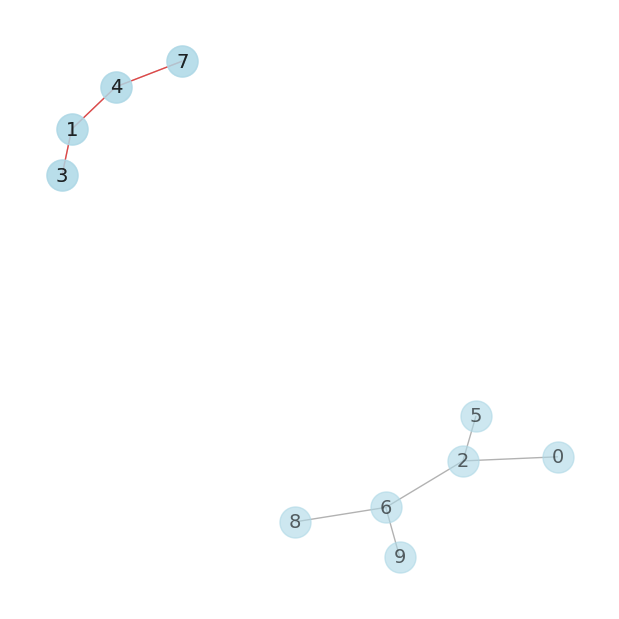

In [105]:
def a(v, u):
    return 1

graph = {    
    0: [2],
    1: [3, 4],
    2: [0, 5, 6],
    3: [1],
    4: [1, 7],
    5: [2],
    6: [2, 8, 9],
    7: [4],
    8: [6],
    9: [6]
    }
mst, suma = DPA(graph, a, 3)
print(f"Suma wag krawędzi MST: {suma}")
print(f"MST: {mst}")

print_graph_mst(graph, mst)

Jak widać pokolorowany został tylko jeden podgraf

Kolejnym istotnym parametrem są wagi krawędzi. W przypadku tego samego pozornie grafu ale z różnymi wagami krawędzi wynik działania algorytmu będzie zupełnie inny. To dość oczywiste, algorytm wybiera krawędzie tak, aby suma wag była jak najmniejsza

Suma wag krawędzi MST: 65
MST: [(5, 2), (2, 0), (0, 1), (1, 3), (1, 4), (2, 6), (4, 7), (4, 9), (6, 8)]


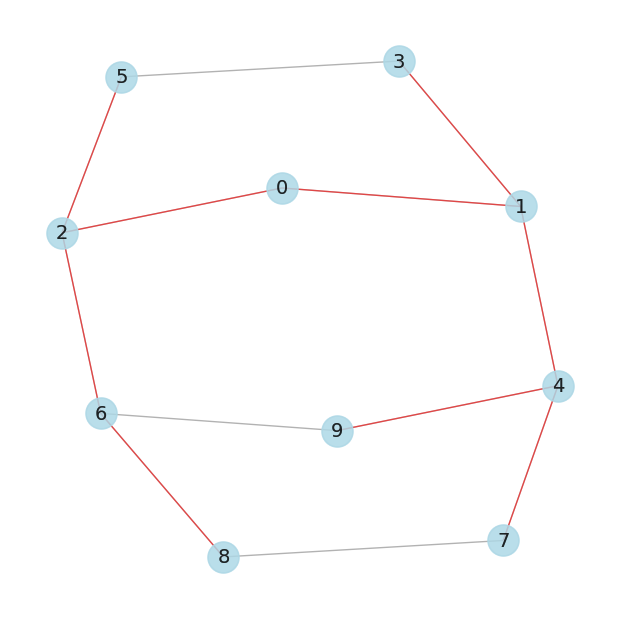

In [106]:
def a(v, u):
    return abs(v+u)

graph = {    
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1, 5],
    4: [1, 7, 9],
    5: [2, 3],
    6: [2, 8, 9],
    7: [4, 8],
    8: [6, 7],
    9: [6, 4]
    }
mst, suma = DPA(graph, a, 5)
print(f"Suma wag krawędzi MST: {suma}")
print(f"MST: {mst}")

print_graph_mst(graph, mst)

Suma wag krawędzi MST: 19
MST: [(5, 3), (3, 1), (1, 0), (0, 2), (1, 4), (4, 7), (7, 8), (8, 6), (6, 9)]


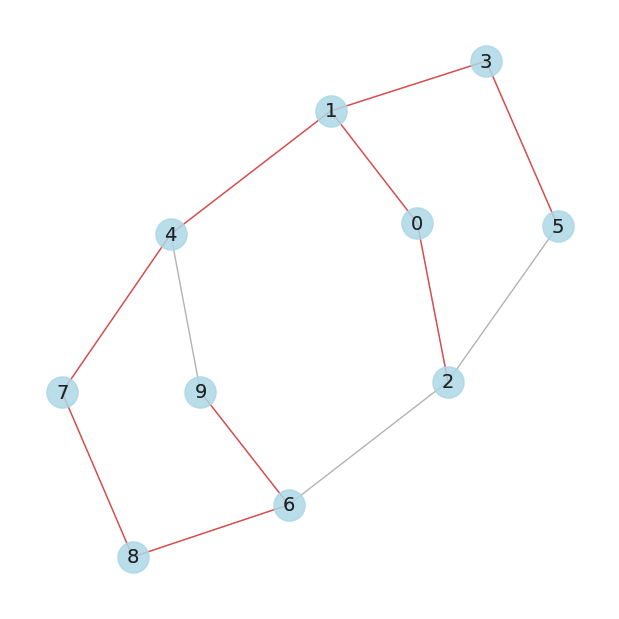

In [107]:
def a(v, u):
    return abs(v-u)


graph = {    
    0: [1, 2],
    1: [0, 3, 4],
    2: [0, 5, 6],
    3: [1, 5],
    4: [1, 7, 9],
    5: [2, 3],
    6: [2, 8, 9],
    7: [4, 8],
    8: [6, 7],
    9: [6, 4]
    }
mst, suma = DPA(graph, a, 5)
print(f"Suma wag krawędzi MST: {suma}")
print(f"MST: {mst}")

print_graph_mst(graph, mst)

Jak widać na powyższych dwóch przypadkach zastosowanie różnych funkcji wagowych dla krawędzi ma kluczowy wpływ na wygląd minimalnego drzewa rozpinajacego grafu.

Również istotną własnością grafy jest jego cykliczność. Jeśli graf jest acykliczny, to jego minimalne drzewo rozpinające będzie się z nim pokrywało. Poniżej przedstawiono przykład

Suma wag krawędzi MST: 9
MST: [(3, 1), (1, 0), (1, 4), (4, 7), (4, 9), (9, 6), (6, 2), (2, 5), (6, 8)]


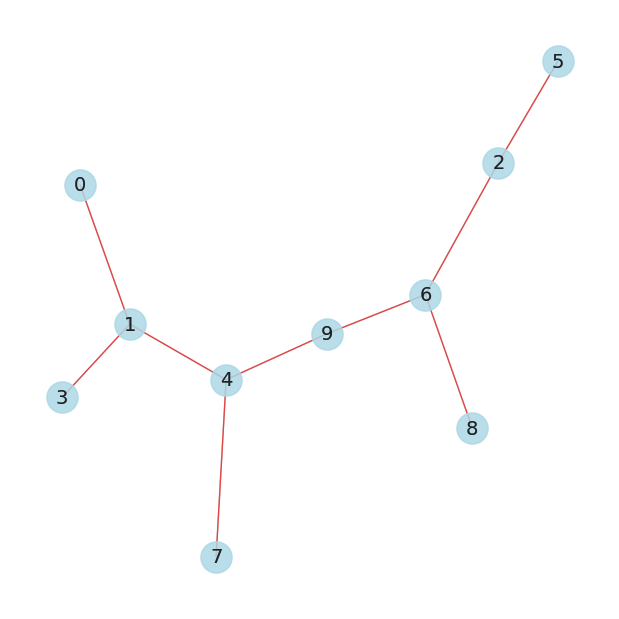

In [108]:
def a(v, u):
    return 1

graph = {    
    0: [1],
    1: [0, 3, 4],
    2: [5, 6],
    3: [1],
    4: [1, 7, 9],
    5: [2],
    6: [2, 8, 9],
    7: [4],
    8: [6],
    9: [6, 4]
    }
mst, suma = DPA(graph, a, 3)
print(f"Suma wag krawędzi MST: {suma}")
print(f"MST: {mst}")

print_graph_mst(graph, mst)

#### Zadanie 3
Algorytm Kruskala polega na wyznaczeniu minimalnego drzewa rozpinjącego poprzez posortowanie krawędzi grafu względem wag rosnąco. Następnie do zbioru minimalnego drzewa rozpinającego dodawane są wierzchołki, któe nie powtórzyły się już wcześniej, w ten sposób unika się cyklu.
Największą złożoność w algorytmie Kruskala ma operacja sortowania krawędzi po wagach. Złożoność sortowania krawędzi wynosi O(ElogE), przy czym E to ilość krawędzi, przy czym pozostałe operacje realizowane są ze złożonością O(E * a(E, V)), gdzie V to liczba krawędzi grafu. Funkcja a rośnie stosunkowo wolno

#### Zadanie 4
Podstawowym wykorzystaniem problemu MST jest projektowanie wszelkiego typu sieci, w których należy doprowadzić połączenie do każdego odbiorcy po jak najmniejszej drodze. Przykładem może być sieć elektryczna. Po dokonaniu odpowiednich uproszczeń problem można zredukować do znalezienia minimalnego drzewa rozpinającego dla grafu, w którym wierzchołkiem początkowym jest elektrownia, a kolejnymi wierzchołkami odbiorcy (bardzo uproszczony model). Wagami mogą być koszty transportu energi, odległości oraz problemy z infrastrukturą.
Aby model jak najlepiej odzwierciedlał rzeczywiste warunki problemu należy w kosztach wag uwzględnić problemy połączeniowe. Połączenia zwykle nie mogą być realizowane wprost od jednego odbiorcy do drugiego, należy uwzględnić obciążenie sieci oraz potencjalne stacje transformatorowe. Algorytm mógłby być zastosowany na dwa sposoby. Najpierw elektrownia - stacje transformatorowe z uwzględnieniem infrastruktury i potencjalnych problemów. Następnie mógłby być wykorzystany drugi raz od stacji transformatorowej do odbiorców w najbliższej okolicy.


#### Źródła:
- Na podstawie materiałów z zajęć oraz wykładu
- Na podstawie opisu algorytmu https://eduinf.waw.pl/inf/alg/001_search/0141.php
- Na podstawie opisu algorytmu https://pl.wikipedia.org/wiki/Algorytm_Kruskala
- Na podstawie teorii https://pl.khanacademy.org/computing/computer-science/algorithms/graph-representation/a/representing-graphs
- Na podstawie teorii https://pl.khanacademy.org/computing/computer-science/algorithms/graph-representation/a/describing-graphs

#### Środowisko:
Jupiter Notebook w Visual Studio Code z rozszerzeniem Jupiter, Python
